### Pagerank

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
full_addr_adj_matrix =   np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                   [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                   [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                   [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                   [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                   [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                   [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                                   [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                                   [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=np.int32)

In [3]:
full_addr_adj_df = pd.DataFrame(full_addr_adj_matrix.T)
full_addr_adj_df.columns += 1
full_addr_adj_df.index += 1
G = nx.DiGraph(full_addr_adj_df)

### Our implementation of PageRank

$r_{j}=\sum_{i\rightarrow j} \beta \frac{r_i}{d_i} + (1-\beta)\frac{1}{N}$

In [4]:
# one iteration of of PageRank on one node
def one_iter_pagerank(G, beta, r0, node_id):
    r1 = 0
    # sum over neighbors of j that direct to i (inLinks)
    for neighbor in G.neighbors(node_id):
        r1 += beta * r0 / G.degree[neighbor]
    # add probability of random teleport
    r1 += (1 - beta) / G.number_of_nodes()
    return r1

In [5]:
# initialize r0
# beta of .8 means probability will follow a link at random, or user will hop around 5 pages before teleport
beta = 0.8
r0 = np.zeros((14,), dtype=np.float64)
for node_id in G.nodes():
    r0[node_id - 1] = 1 / G.number_of_nodes()
r0

array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857])

In [6]:
# initialize old r vec
old = np.zeros((14,), dtype=np.float64)
for node_id in G.nodes():
    old[node_id - 1] = np.inf

In [7]:
threshold = .000001
# compute til norm of change less than threshold
while np.linalg.norm(old - r0) > threshold:
    pagerank_values = {}
    # one iteration of pagerank for all nodes
    for node_id in G.nodes():
        old[node_id - 1] = r0[node_id - 1]
        # per node pagerank computation
        pagerank_values[node_id] = one_iter_pagerank(G, beta, r0[node_id - 1], node_id)
        # updating r_j
        r0[node_id - 1] = pagerank_values[node_id]

In [8]:
# normalize pagerank values
final_pagerank = {r_j + 1: round(r0[r_j] / sum(r0), 3) for r_j in range(len(r0))}
# final probability distribution
final_pagerank

{1: 0.086,
 2: 0.086,
 3: 0.077,
 4: 0.039,
 5: 0.048,
 6: 0.048,
 7: 0.05,
 8: 0.143,
 9: 0.039,
 10: 0.039,
 11: 0.143,
 12: 0.143,
 13: 0.029,
 14: 0.029}

In [9]:
# setting pagerank values as node features
nx.set_node_attributes(G, final_pagerank, 'pagerank')

In [10]:
G.nodes.data()

NodeDataView({14: {'pagerank': 0.029}, 13: {'pagerank': 0.029}, 12: {'pagerank': 0.143}, 11: {'pagerank': 0.143}, 10: {'pagerank': 0.039}, 9: {'pagerank': 0.039}, 8: {'pagerank': 0.143}, 7: {'pagerank': 0.05}, 6: {'pagerank': 0.048}, 5: {'pagerank': 0.048}, 4: {'pagerank': 0.039}, 3: {'pagerank': 0.077}, 2: {'pagerank': 0.086}, 1: {'pagerank': 0.086}})

In [11]:
labels = {node_id: str(node_id) + ': ' + str(final_pagerank[node_id])[1:] for node_id in final_pagerank}

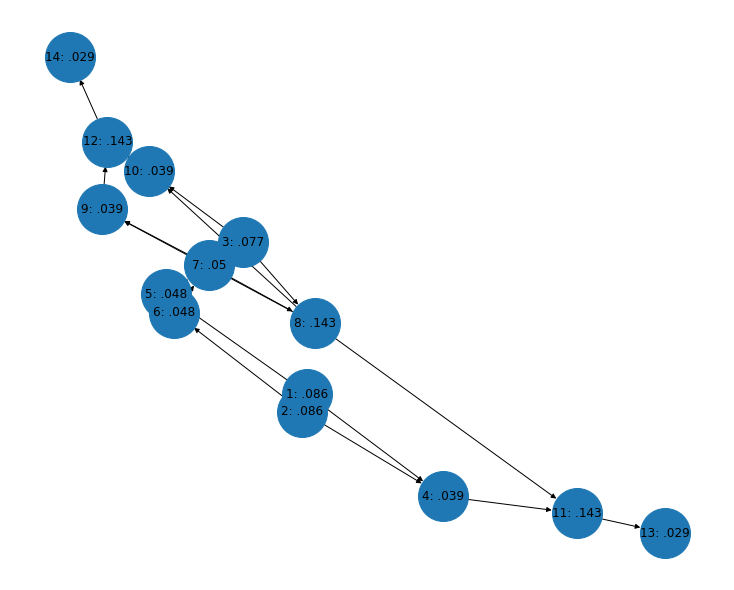

In [12]:
plt.figure(figsize=(10, 8))
nx.draw(G, pos=nx.spring_layout(G),labels=labels, node_size=2500)

### NetworkX PageRank Implementation

Our implementation results seems to differ from NetworkX's, likely due to nodes 13 and 14 being dead ends. 

The formulation of PageRank we use assumes there are no dead ends in our adjacency matrix.

In [13]:
nx_pagerank = nx.pagerank(G, alpha=.8)
nx_pagerank = {node_id: round(nx_pagerank[node_id], 3) for node_id in sorted(nx_pagerank)}
nx_pagerank

{1: 0.037,
 2: 0.037,
 3: 0.037,
 4: 0.047,
 5: 0.062,
 6: 0.062,
 7: 0.077,
 8: 0.068,
 9: 0.076,
 10: 0.055,
 11: 0.083,
 12: 0.132,
 13: 0.094,
 14: 0.133}

In [14]:
final_pagerank

{1: 0.086,
 2: 0.086,
 3: 0.077,
 4: 0.039,
 5: 0.048,
 6: 0.048,
 7: 0.05,
 8: 0.143,
 9: 0.039,
 10: 0.039,
 11: 0.143,
 12: 0.143,
 13: 0.029,
 14: 0.029}

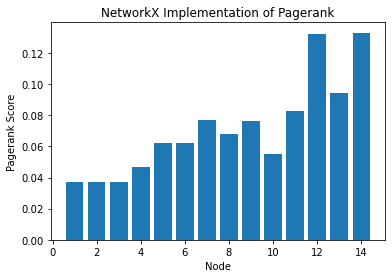

In [15]:
plt.bar(nx_pagerank.keys(), nx_pagerank.values())
plt.xlabel('Node')
plt.ylabel('Pagerank Score')
plt.title('NetworkX Implementation of Pagerank')
plt.show()

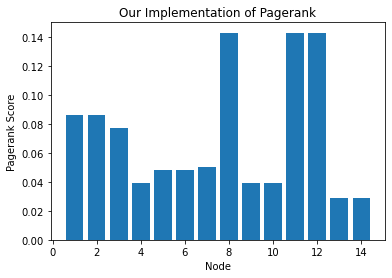

In [16]:
plt.bar(final_pagerank.keys(), final_pagerank.values())
plt.xlabel('Node')
plt.ylabel('Pagerank Score')
plt.title('Our Implementation of Pagerank')
plt.show()